<a href="https://colab.research.google.com/github/SBU-COSMOLIKE/CoCoAGoogleColabExamples/blob/main/Cocoa_Example_Profile_Likelihoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive (optional, does not work with local runtime)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

## Install Miniforge

In [4]:
%%bash
export CONDA_DIR="/content/conda"
mkdir "${CONDA_DIR:?}"
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
/bin/bash Miniforge3-$(uname)-$(uname -m).sh -f -b -p "${CONDA_DIR:?}"
/bin/bash
source $CONDA_DIR/etc/profile.d/conda.sh \
      && conda config --set auto_update_conda false \
      && conda config --set show_channel_urls true \
      && conda config --set auto_activate_base false \
      && conda config --prepend channels conda-forge \
      && conda config --add allowlist_channels conda-forge \
      && conda config --set channel_priority strict \
      && conda init bash
source ~/.bashrc

PREFIX=/content/conda
Unpacking bootstrapper...
Unpacking payload...
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2025.11.12-hbd8a1cb_0.conda
Extracting libgomp-15.2.0-he0feb66_15.conda
Extracting nlohmann_json-abi-3.12.0-h0f90c79_1.conda
Extracting pybind11-abi-11-hc364b38_1.conda
Extracting python_abi-3.12-8_cp312.conda
Extracting tzdata-2025b-h78e105d_0.conda
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-15.2.0-he0feb66_15.conda
Extracting bzip2-1.0.8-hda65f42_8.conda
Extracting c-ares-1.34.5-hb9d3cd8_0.conda
Extracting keyutils-1.6.3-hb9d3cd8_0.conda
Extracting libexpat-2.7.3-hecca717_0.conda
Extracting libffi-3.5.2-h9ec8514_0.conda
Extracting libgcc-ng-15.2.0-h69a702a_15.conda
Extracting libiconv-1.18-h3b78370_2.conda
Extracting liblzma-5.8.1-hb9d3cd8_2.conda
Extracting libnsl-2.0.1-hb9d3cd8_1.conda
Extracting libstdcxx-15.2.0-h934c35e_15.conda
Extracting libuuid-2.41.2-h5347b49_1.conda
Extracting libzlib-1.3.1-hb9d3cd8_2.conda
Extract

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 81.7M  100 81.7M    0     0  86.5M      0 --:--:-- --:--:-- --:--:--  544M
WARNING conda.cli.main_config:_set_key(456): Key auto_activate_base is an alias of auto_activate; setting value with latter


## Install Cocoa conda Environment


In [5]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda create -n lockenv -c conda-forge python=3.10 conda-lock=2.* wget --quiet --yes # Google Collab: additional arguments --quite --yes
wget https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml

Retrieving notices: ...working... done
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/conda/envs/lockenv

  added / updated specs:
    - conda-lock=2
    - python=3.10
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    annotated-types-0.7.0      |     pyhd8ed1ab_1          18 KB  conda-forge
    appdirs-1.4.4              |     pyhd8ed1ab_1          14 KB  conda-forge
    backports-1.0              |     pyhd8ed1ab_5           7 KB  conda-forge
    backports.tarfile-1.2.0    |     pyhcf101f3_2          35 KB  conda-forge
    brotli-python-1.2.0        |  py310hba01987_1         358 KB  conda-forge
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    cachecontrol-0.14.3        |     pyha770c72_0          23 KB  conda-forge
    cachecontrol-with-filecache-0.14.3

--2026-01-13 22:21:16--  https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100985 (99K) [text/plain]
Saving to: ‘cocoapy310-linux.yml’

     0K .......... .......... .......... .......... .......... 50% 12.3M 0s
    50K .......... .......... .......... .......... ........  100% 61.5M=0.005s

2026-01-13 22:21:16 (20.3 MB/s) - ‘cocoapy310-linux.yml’ saved [100985/100985]



In [6]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate lockenv
conda-lock install -n cocoa cocoapy310-linux.yml

INFO:root:Transaction
INFO:root:
INFO:root:  Prefix: /content/conda/envs/cocoa
INFO:root:
INFO:root:  Updating specs:
INFO:root:
INFO:root:   - _libgcc_mutex==0.1=conda_forge
INFO:root:   - git-lfs==3.6.1=h59e48b9_0
INFO:root:   - kernel-headers_linux-64==3.10.0=he073ed8_18
INFO:root:   - libboost-headers==1.85.0=ha770c72_4
INFO:root:   - mpi==1.0=openmpi
INFO:root:   - python_abi==3.10=8_cp310
INFO:root:   - tzdata==2025b=h78e105d_0
INFO:root:   - ca-certificates==2025.1.31=hbd8a1cb_1
INFO:root:   - ld_impl_linux-64==2.43=h712a8e2_5
INFO:root:   - libgcc-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - libgomp==15.1.0=h767d61c_4
INFO:root:   - libstdcxx-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - sysroot_linux-64==2.17=h0157908_18
INFO:root:   - _openmp_mutex==4.5=2_gnu
INFO:root:   - binutils_impl_linux-64==2.43=h4bf12b8_5
INFO:root:   - binutils==2.43=h4852527_5
INFO:root:   - binutils_linux-64==2.43=h4852527_5
INFO:root:   - libgcc==15.1.0=h767d61c_4
INFO:root:   - c-ares=

In [7]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Collab require conda to be loaded at every cell
conda activate cocoa                                  # Google Collab require conda to be loaded at every cell
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gcc "${CONDA_PREFIX}"/bin/gcc
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-g++ "${CONDA_PREFIX}"/bin/g++
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gfortran "${CONDA_PREFIX}"/bin/gfortran
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ar "${CONDA_PREFIX}"/bin/gcc-ar
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ranlib "${CONDA_PREFIX}"/bin/gcc-ranlib
git-lfs install

Git LFS initialized.


## Clone, setup and compile Cocoa (.local) env

In [8]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate cocoa                                  # Google Colab require conda to be loaded at every cell
git clone https://github.com/CosmoLike/cocoa.git --branch v5.0beta1 cocoa

Cloning into 'cocoa'...
Note: switching to '26a5137a1eefabf4088885349f185b296b1bb37e'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Filtering content: 100% (9/9), 265.37 MiB | 67.50 MiB/s, done.


In [9]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source setup_cocoa.sh

SETUP COCOA INSTALLATION PACKAGES 
  SETUP COCOA PRIVATE PYTHON ENV 
  SETUP COCOA PRIVATE PYTHON ENV DONE
  GETTING SPDLOG LIBRARY (CORE LIBS) 
  GETTING SPDLOG LIBRARY (CORE LIBS) DONE
  GETTING ARMA LIBRARY DONE (CORE LIBS) 
  GETTING ARMA LIBRARY DONE (CORE LIBS) DONE
  GETTING CARMA LIBRARY DONE (CORE LIBS) 
  GETTING CARMA LIBRARY DONE (CORE LIBS) DONE
  INSTALLING A FEW PYTHON CORE LIBRARIES VIA PIP 
  INSTALLING PYTHON CORE LIBRARIES VIA PIP DONE
  PIP INSTALL MACHINE LEARNING GPU PACKAGES (takes a while O(5-10min)...) 
  PIP INSTALL MACHINE LEARNING GPU PACKAGES DONE
  SETUP COBAYA 
  SETUP COBAYA DONE
  INSTALLING FGSPECTRA 
  INSTALLING FGSPECTRA DONE
  SETUP SIMONS OBSERVATORY SYSLIBRARY 
  SETUP SIMONS OBSERVATORY SYSLIBRARY DONE
  SETUP SIMONS OBSERVATORY MFLIKE 
  SETUP SIMONS OBSERVATORY MFLIKE DONE
  SETUP ACTDR4 
  SETUP ACTDR4 DONE
  SETUP ACTDR6 (CMBONLY) 
  SETUP ACTDR6 (CMBONLY) DONE
  SETUP ACTDR6 (MFLIKE) 
  SETUP ACTDR6 (MFLIKE) DONE
  SETUP POLYCHORD 
  SETUP 

CosmoRec.v2.0.3b.ta 100%[===================>]  19.81M  13.3MB/s    in 1.5s    
ACT_dr6_likelihood_ 100%[===================>] 344.57M  1.38MB/s    in 4m 11s  
dr6_data_cmbonly.ta 100%[===================>] 280.26K  1.50MB/s    in 0.2s    
dr6_data.tar.gz     100%[===================>] 394.06M  1.37MB/s    in 4m 48s  
v0.8.tar.gz         100%[===================>] 198.35M  9.90MB/s    in 19s     


In [10]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source compile_cocoa.sh

COMPILING EXTERNAL MODULES 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) DONE
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) 
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) DONE
  COMPILING CARMA CPP LIBRARY (CORE LIBS) 
  COMPILING CARMA CPP LIBRARY (CORE LIBS) DONE
  COMPILING COSMOREC RECOMBINATION CODE 
  COMPILING COSMOREC RECOMBINATION CODE DONE
  COMPILING CAMB 
  COMPILING CAMB DONE
  COMPILING CLASS 
  COMPILING CLASS DONE
  COMPILING PLANCK LIKELIHOOD 
  COMPILING PLANCK LIKELIHOOD DONE
  COMPILING POLYCHORD 
  COMPILING POLYCHORD DONE
  COMPILING FGSPECTRA 
  COMPILING FGSPECTRA DONE
  COMPILING COSMOPOWER 
  COMPILING COSMOPOWER DONE
  COMPILING SIMONS OBSERVATORY SYSLIBRARY 
  COMPILING SIMONS OBSERVATORY SYSLIBRARY DONE
  COMPILING SIMONS OBSERVATORY MKLIKE 
  COMPILING SIMONS OBSERVATORY MKLIKE DONE
  COMPILING ACT-DR4 
  COMPILING ACT-DR4 DONE
  COMPILING ACT-DR6 (CMBONLY) 
  COMPILING ACT-DR6 (CMBONLY) DONE
  COMPILING ACT-DR6 (M

/content/cocoa/Cocoa/external_modules/code/cosmolike/basics.c: In function 'malloc4d':
/content/cocoa/Cocoa/external_modules/code/cosmolike/basics.c:76:7: warning: implicit declaration of function 'posix_memalign' [-Wimplicit-function-declaration]
   76 |   if (posix_memalign(&raw_block, 64, sizeof(double***)*nx +
      |       ^~~~~~~~~~~~~~


##Saving CoCoA on drive (optional, does not work with local runtime)


In [14]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"

mkdir -p "$DEST"

if [[ -f "$ARCHIVE" ]]; then
  echo "Backup already exists: $ARCHIVE — skipping."
  exit 0
fi

tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_basic_cocoa.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


# Alternative Installation: Load CoCoA from Drive (does not work with local runtime)


In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 452572268.089067387 s in the future


# Run Global Minimizer for all LCDM Parameters

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
# ~12 MPIs sweet spot that made GPU utilization ~50%
mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    python ./projects/example/EXAMPLE_EMUL_MINIMIZE1.py \
        --root ./projects/example/ --outroot "EXAMPLE_EMUL_MIN1" --nstw 250

 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                            

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
tar -czf "$DEST/colab_test_profile_lcdm_CHK1_$(date +%F_%H-%M).tar.gz" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/xxx"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

# Run MCMC to get a good covariance

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
mpirun -n 4 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    cobaya-run ./projects/example/EXAMPLE_EMUL_MCMC1.yaml -r

[0 : output] Output to be read-from/written-into folder './projects/example/chains', with prefix 'EXAMPLE_EMUL_MCMC1'
[0 : output] Found existing info files with the requested output prefix: './projects/example/chains/EXAMPLE_EMUL_MCMC1'
[0 : output] Let's try to resume/load.
[0 : output] Found an old sample. Resuming.
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
----
clik version 1618e9a405c2
  plik_cmbonly
Checking likelihood './external_modules/data/planck/plc_3.0/hi_l/plik_lite/plik_lite_v22_TT

/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from v

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
tar -czf "$DEST/colab_test_profile_lcdm_CHK2_$(date +%F_%H-%M).tar.gz" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/xxx"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

# Run Profile for all LCDM Parameters

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

declare -a arr=(0 1 2 3 4 6) # parameters to be profiled

for i in "${arr[@]}"; do
  # Google Colab requires some tweaks in the mpirun command (compared to our documentation)
  # (1) --bind-to core:overload-allowed
  # (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
  # (3) The new option --allow-run-as-root
  # ~12 MPIs sweet spot that made GPU utilization ~50%
  mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
      --bind-to core:overload-allowed --rank-by slot --map-by slot \
      python ./projects/example/EXAMPLE_EMUL_PROFILE1.py \
          --root ./projects/example/ --cov 'chains/EXAMPLE_EMUL_MCMC1.covmat' \
          --outroot "EXAMPLE_EMUL_PROFILE1" --factor 3 --nstw 250 --numpts 10 \
          --profile ${i} --minfile="./projects/example/chains/EXAMPLE_EMUL_MIN1.txt"
done

 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                            

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
ARCHIVE="$DEST/colab_test_profile_lcdm_CHK3_$(date +%F_%H-%M).tar.gz"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_test_profile_lcdm_CHK3_2025-08-29_22-34.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_test_profile_lcdm_CHK3_2025-08-29_20-37.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 452484126.745203254 s in the future


# Plot Profile



In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

python - <<'PY'
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import os
import matplotlib
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'png'

# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(15.1, 12.1))
# ------------------------------------------------------------------------------
master = gridspec.GridSpec(2,
                           1,
                           height_ratios=[1,1.1],
                           hspace=0.225) # Master grid
top = gridspec.GridSpecFromSubplotSpec(1,
                                       4,
                                       subplot_spec=master[0],
                                       wspace=0.275)
ax = [fig.add_subplot(top[0,i]) for i in range(4)]
bottom = gridspec.GridSpecFromSubplotSpec(1,
                                          3,
                                          subplot_spec=master[1],
                                          wspace=0.35)
ax += [fig.add_subplot(bottom[0,i]) for i in range(3)]
# ------------------------------------------------------------------------------
root = os.environ['ROOTDIR'] + "/projects/example/chains/EXAMPLE_EMUL_PROFILE1."
params = ['logA', 'ns', 'omegabh2', 'omegach2', 'thetastar', 'tau', 'A_planck' ]
latex  = ["$\\log(10^{10} A_\\mathrm{s})$", "$n_\\mathrm{s}$",
          "$100\\Omega_\\mathrm{b} h^2$", "$10\\Omega_\\mathrm{c} h^2$",
          "$100\\theta_*$", "$\\tau_\\mathrm{reio}$", "$A_{\\rm Planck}$" ]
# ------------------------------------------------------------------------------
for i in range(7):
    data = np.loadtxt(root + params[i] + '.txt', comments="#",)
    if i == 2:
        data[:,0] = 100*data[:,0]
    if i == 3:
        data[:,0] = 10*data[:,0]
    x  = data[:, 0]
    y  = data[:, 1]-np.min(data[:,1])

    ax[i].plot(x, y,
               marker='D',c='black', linestyle='None', markersize=4,
               alpha=1.0,lw=1.0,
               label=params[i])

    # fit a parabola
    coeffs = np.polyfit(x, y, deg=2)
    xfit = np.linspace(np.min(x), np.max(x), 300)
    yfit = np.polyval(coeffs, xfit)
    ax[i].plot(xfit, yfit, color='blue', lw=1.5, alpha=0.7, label='Parabola fit')
# ------------------------------------------------------------------------------
    ax[i].grid(True)
    ax[i].grid(True,
               which='minor',
               color='black',
               linestyle='--',
               linewidth=0.25,
               alpha=0.1)
    ax[i].minorticks_on()
    ax[i].tick_params(axis='both',
                      which='major',
                      labelsize=15)
    ax[i].tick_params(axis='both',
                      which='minor',
                      labelsize=15)
    ax[i].set_xlabel(latex[i],fontsize = 19)
    if i == 0 or i==4:
        ax[i].set_ylabel('$\\Delta \\chi^2$',fontsize = 19)
    ax[i].set_ylim(np.min(y),np.max(y))
    ax[i].set_xlim(data[0,0]-0.075*(data[-1,0]-data[0,0]),
                   x[-1]+0.075*(x[-1]-x[0]))
# ------------------------------------------------------------------------------
    # get 1σ, 2σ and 3σ - print as vertical lines
    sigma_lines = {}
    for y0 in [1, 4, 9]:
        a, b, c = coeffs
        roots = np.roots([a, b, c - y0])
        real_roots = [np.real(r) for r in roots if np.isreal(r)]
        if len(real_roots) == 2:
            sigma_lines[y0] = sorted(real_roots)
            for r in real_roots:
                ax[i].axvline(x=r,
                              linestyle='--',
                              color='grey',
                              alpha=0.5,
                              lw=1.0)
    # Build annotation text
    lmap = {1: "1σ", 4: "2σ", 9: "3σ"}
    tlines = []
    prec = max(0, int(-math.floor(math.log10(x[-1] - x[0]))) + 1)
    for y0 in [1, 4, 9]:
        if y0 in sigma_lines:
            lo, hi = sigma_lines[y0]
            tlines.append(f"{lmap[y0]}: [{lo:.{prec}f}, {hi:.{prec}f}]")
    ax[i].text(
        0.5,
        0.90,
        "\n".join(tlines),
        transform=ax[i].transAxes,
        fontsize=11,
        va='top', ha='center',
        bbox=dict(boxstyle="round",
                  facecolor='white',
                  alpha=0.8,
                  edgecolor='black'))
# ------------------------------------------------------------------------------
plt.subplots_adjust(bottom=0.25, left = 0.2)
plt.savefig(os.environ['ROOTDIR'] + "/projects/example/chains/EXAMPLE_PLOT_PROFILE1")
# From GPT: hard-close to avoid destructor noise in Colab
import gc
plt.close('all')
gc.collect()
PY

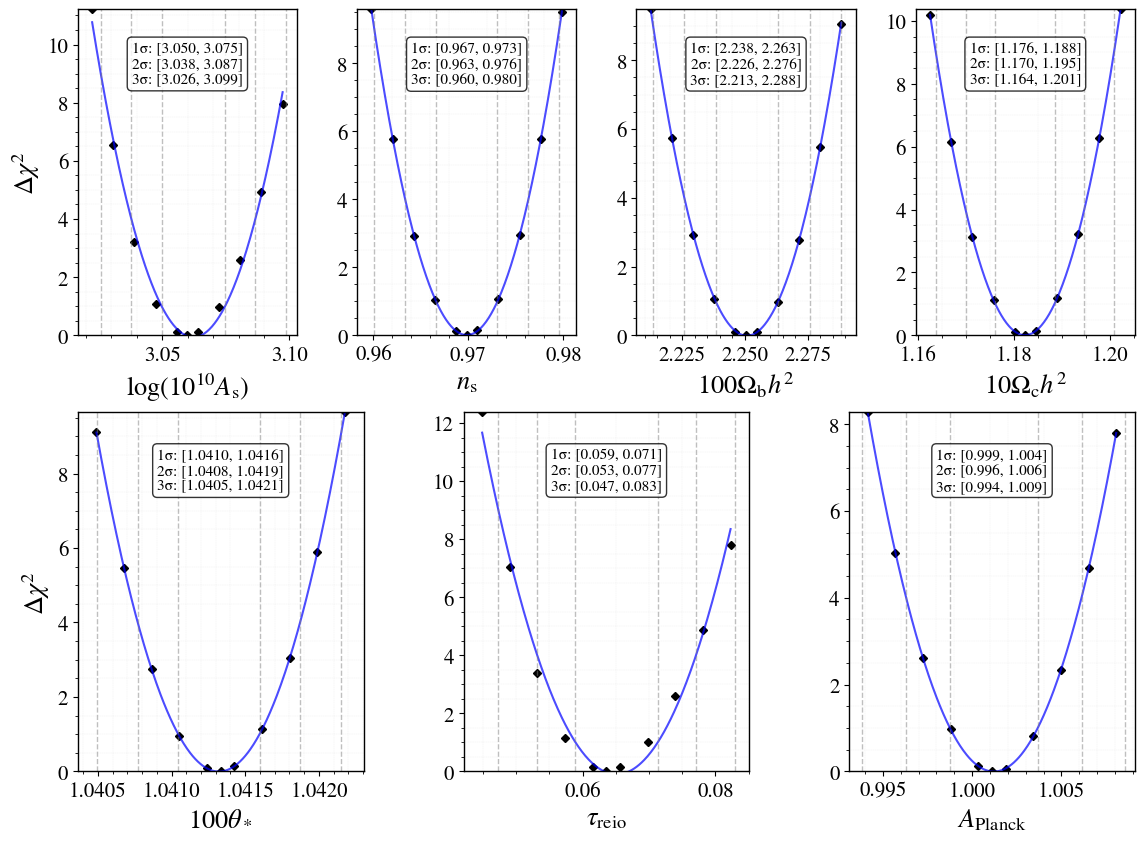

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/cocoa/Cocoa/projects/example/chains/EXAMPLE_PLOT_PROFILE1.png"))